# Fig.4a Fitting and prediction examples using noisy AIZAWA

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import os
import json
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style()
import pandas as pd

import jax
from jax import config
config.update("jax_enable_x64", True)
try:
    jax.devices()
except:
    config.update('jax_platforms','cpu')
    
sys.path.append(os.path.join(os.getcwd(),'../repos/dysts/'))
import dysts
from dysts.datasets import *
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *

# Darts implementation

# HS using local darts
sys.path.append(os.path.join(os.getcwd(),'../repos/darts/'))
import darts
from darts.models import *
from darts import TimeSeries
import darts.models

import numpy as np
np.random.seed(0)

from copy import deepcopy

loaded!


[2024-10-07 12:01:59,670] WARNING | darts.models | Support for Facebook Prophet is not available. To enable it, install "darts", "u8darts[prophet]" or "u8darts[all]" (with pip);or "u8darts-all" (with conda).
2024-10-07 12:02:02.585245: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


# Fitting to the loaded chaotic system

In [2]:
input_path = "train_univariate__pts_per_period_100__periods_12.json"
#input_path = os.getcwd() + "/../dysts/dysts/data/train_univariate__pts_per_period_100__periods_12_noise.json"
#input_path = os.getcwd() + "/../dysts/benchmarks/results/results_train_univariate__pts_per_period_100__periods_12_noise.json"

dataname = os.path.splitext(os.path.basename(os.path.split(input_path)[-1]))[0]
equation_data = load_file(input_path)    

hyperparameter_path = "../repos/dysts/benchmarks/hyperparameters/220812_hyperparameters_" + dataname + ".json"
#220518_hyperparameters_
with open(hyperparameter_path, "r") as file:
    all_hyperparameters = json.load(file)

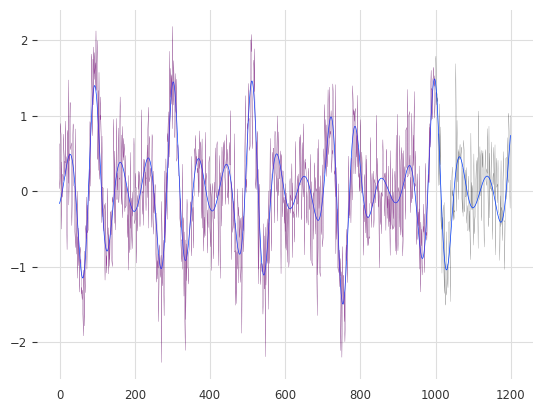

In [3]:
equation_name = "Aizawa" 
# "Aizawa" 
# "Arneodo"
# "AnishchenkoAstakhov"
# "BelousovZhabotinsky"
# "BlinkingVortex"
# "CellularNeuralNetwork"
# "Chen"
# "Chua"
# "CircadianRhythm"
# "CoevolvingPredatorPrey"
# "Duffing"
# "Halvorsen"
# "HenonHeiles"
# "Lorenz"
# "PiecewiseCircuit"
# "Rossler"
# "Thomas"
# "Blasius"

# Error
# "GenesioTesi"

train_data = np.copy(np.array(equation_data.dataset[equation_name]["values"]))
train_data_noiseless = deepcopy(train_data)

#add noise
noise_scale = np.std(train_data[:int(5/6 * len(train_data))]) # prevent leakage
train_data += 0.8 * np.std(train_data) * np.random.normal(size=train_data.shape[0])
      
split_point = int(5/6 * len(train_data))
y_train, y_val = train_data[:split_point], train_data[split_point:]
y_train_ts, y_test_ts = TimeSeries.from_dataframe(pd.DataFrame(train_data)).split_before(split_point)

y_val_pred = {}

plt.plot(train_data, lw=.1)
plt.plot(train_data_noiseless, lw=.5)
plt.plot(y_train, lw=.1)

## RBF Takens

In [4]:
# # Fitting NLSS
# model_name = "RBF_Takens" #"LSS"##"NLSS_Sampling" #"LSS" #
# print(all_hyperparameters[equation_name][model_name])
# model_RBF = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
# model_RBF.fit(y_train_ts)

In [5]:
# # Predictiong by RBF
# tmp = model_RBF.predict(len(y_val))
# y_val_pred = {model_name: tmp}

# plt.plot(train_data, lw=.1)
# y_val_pred[model_name].plot(color="red", label="Prediction")

In [6]:
darts.models

<module 'darts.models' from '/app/work/notebooks/../repos/darts/darts/models/__init__.py'>

## LSS Takens

In [7]:
# Fitting LSS
# model_name = "LSS_Takens"
# model_LSS_Takens = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
# model_LSS_Takens.fit(y_train_ts)

In [8]:
# Predictiong by LSS
# tmp = model_LSS_Takens.predict(len(y_val))
# y_val_pred = {model_name: tmp} 

# plt.plot(train_data, lw=.1)
# y_val_pred[model_name].plot(color="red", label="Prediction")

## NLSS Takens

In [9]:
# Fitting NLSS
model_name = "NLSS_Takens" #"LSS"##"NLSS_Sampling" #"LSS" #
model_NLSS = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model_NLSS.fit(y_train_ts)

Dx = 5, Dz = 5, Dk = 30
Iteration 1 - Log likelihood=-3517.3
Iteration 2 - Log likelihood=-3207.3
Iteration 3 - Log likelihood=-3005.5
Iteration 4 - Log likelihood=-2906.7
Iteration 5 - Log likelihood=-2861.6
Iteration 6 - Log likelihood=-2838.0
Iteration 7 - Log likelihood=-2822.9
Iteration 8 - Log likelihood=-2811.6
Iteration 9 - Log likelihood=-2802.2
Iteration 10 - Log likelihood=-2793.9
Iteration 11 - Log likelihood=-2786.5
Iteration 12 - Log likelihood=-2779.5
Iteration 13 - Log likelihood=-2772.9
Iteration 14 - Log likelihood=-2766.6
Iteration 15 - Log likelihood=-2760.5
Iteration 16 - Log likelihood=-2754.6
Iteration 17 - Log likelihood=-2748.8
Iteration 18 - Log likelihood=-2743.0
Iteration 19 - Log likelihood=-2737.4
Iteration 20 - Log likelihood=-2731.9
Iteration 21 - Log likelihood=-2726.5
Iteration 22 - Log likelihood=-2721.2
Iteration 23 - Log likelihood=-2716.1
Iteration 24 - Log likelihood=-2711.2
Iteration 25 - Log likelihood=-2706.5
Iteration 26 - Log likelihood=-2701

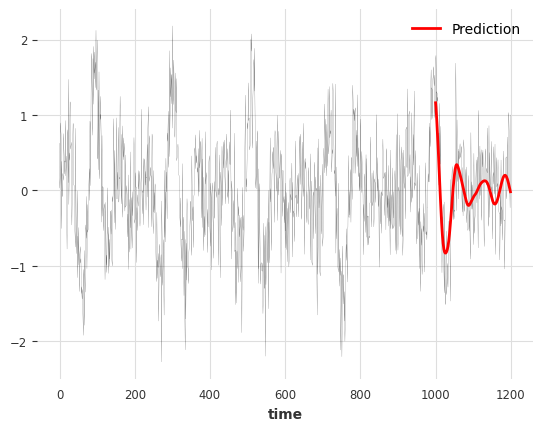

In [15]:
# Predictiong by NLSS
#tmp = model_NLSS.predict(len(y_val))
#tmp = model_NLSS.predict_noiseless(len(y_val))
#tmp = model_NLSS.predict_sample(len(y_val))

y_val_pred[model_name] = model_NLSS.predict(len(y_val))

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

In [16]:
# # Predictiong by NLSS
# #tmp = model_NLSS.predict(len(y_val))
# tmp = model_NLSS.predict_noiseless(len(y_val))
# y_val_pred = {model_name: tmp}

# plt.plot(train_data, lw=.1)
# y_val_pred[model_name].plot(color="red", label="Prediction")

In [17]:
DIM = model_NLSS.ssm_emd.sm.Dk * (1 + 2*model_NLSS.ssm_emd.sm.Dz)
DIM

330

In [18]:
# Saving data
#y_train_ts.to_pickle('y_train_ts.pkl')
#y_train_ts.to_csv('../data/y_train_ts.csv')

## ARIMA

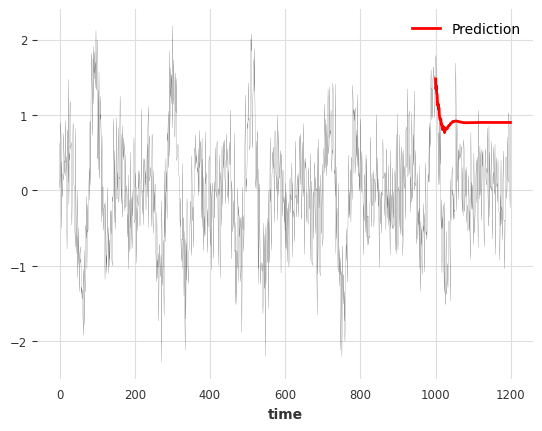

In [19]:
#model_name = "KalmanForecaster"
model_name = "ARIMA"
model = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model.fit(y_train_ts)

y_val_pred[model_name] = model.predict(len(y_val))

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

## RNN

/usr/local/lib/python3.10/site-packages/torch/random.py:159: UserWarning: CUDA reports that you have 2 available devices, and you have used fork_rng without explicitly specifying which devices are being used. For safety, we initialize *every* CUDA device by default, which can be quite slow if you have a lot of CUDAs. If you know that you are only making use of a few CUDA devices, set the environment variable CUDA_VISIBLE_DEVICES or the 'devices' keyword argument of fork_rng with the set of devices you are actually using. For example, if you are using CPU only, set device.upper()_VISIBLE_DEVICES= or devices=[]; if you are using device 0 only, set CUDA_VISIBLE_DEVICES=0 or devices=[0].  To initialize all devices and suppress this warning, set the 'devices' keyword argument to `range(torch.cuda.device_count())`.
  warnings.warn(message)
[2024-10-07 12:39:17,714] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be re

Epoch 0:   0%|          | 0/31 [00:00<?, ?it/s] 

/usr/local/lib/python3.10/site-packages/torch/__init__.py:747: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:431.)
  _C._set_default_tensor_type(t)


Epoch 199: 100%|██████████| 31/31 [00:00<00:00, 86.16it/s, loss=0.114, train_loss=0.108] 

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 31/31 [00:00<00:00, 85.76it/s, loss=0.114, train_loss=0.108]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 19.04it/s]


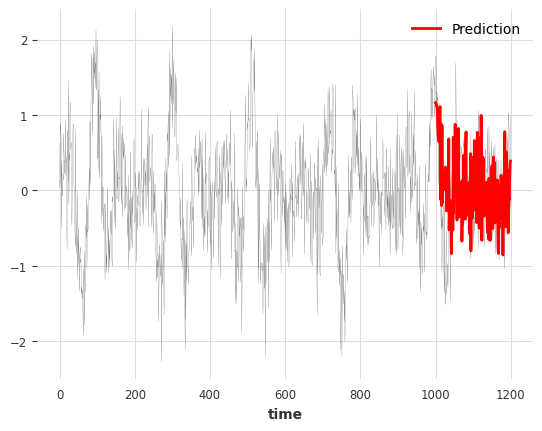

In [20]:
model_name = "RNNModel"
model = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model.fit(y_train_ts)

y_val_pred[model_name] = model.predict(len(y_val))

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

In [21]:
## TransformerModel

[2024-10-07 12:40:35,229] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2024-10-07 12:40:35,229] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2024-10

Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 34.21it/s, loss=0.204, train_loss=0.297] 

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 30/30 [00:00<00:00, 34.11it/s, loss=0.204, train_loss=0.297]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


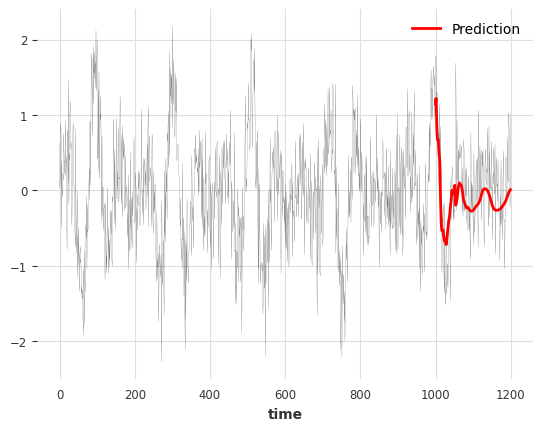

In [22]:
model_name = "TransformerModel"
model = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model.fit(y_train_ts)

y_val_pred[model_name] = model.predict(len(y_val))

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

## NBEATSModel

[2024-10-07 12:42:03,653] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2024-10-07 12:42:03,653] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2024-10

Epoch 99: 100%|██████████| 30/30 [00:01<00:00, 19.08it/s, loss=0.000218, train_loss=0.000383]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 30/30 [00:01<00:00, 19.05it/s, loss=0.000218, train_loss=0.000383]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


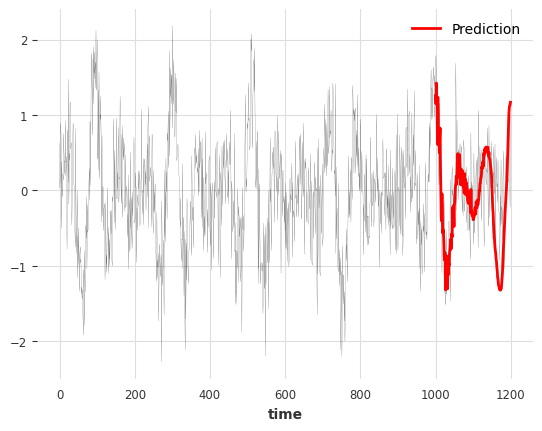

In [23]:
model_name = "NBEATSModel"
model = getattr(darts.models, model_name)(**all_hyperparameters[equation_name][model_name])
model.fit(y_train_ts)

y_val_pred[model_name] = model.predict(len(y_val))

plt.plot(train_data, lw=.1)
y_val_pred[model_name].plot(color="red", label="Prediction")

# Plot

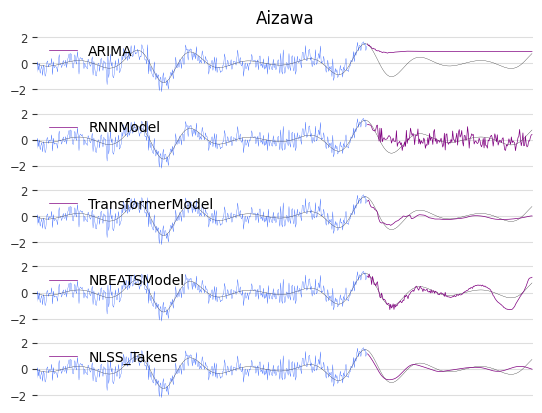

In [33]:
model_names = ['ARIMA','RNNModel','TransformerModel','NBEATSModel','NLSS_Takens']

i = 1
for model_name in model_names:
    plt.subplot(len(model_names),1,i)
    
    
    plt.plot(train_data_noiseless, lw = .2)
    plt.plot(y_train, lw = .2)
    
    # if model_name == 'NLSS_Takens':
    #     y_val_pred[model_name].plot(label=model_name, color='red') #
    #     plt.legend(loc='upper left')
    # else:
    #     ax = y_val_pred[model_name].plot(xticks=[], color='blue', label=model_name)
    #     plt.legend(loc='upper left')
    #     plt.xlabel('')    

    ax = y_val_pred[model_name].plot(xticks=[], color='purple', linewidth=0.5, label=model_name)
    plt.legend(loc='upper left')
    plt.xlabel('')    

    plt.xlim([600, 1200]) 
    #plt.ylim([-2, 2]) 
    
    if i == 1:
        plt.title(f'{equation_name}')
        
        
    i = i + 1